In [3]:
import numpy as np
import seaborn as sns
from matplotlib import cm
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
sns.set_style("whitegrid")
sns.set_context("paper", font_scale=1.4)
sns.set_palette("Set1")

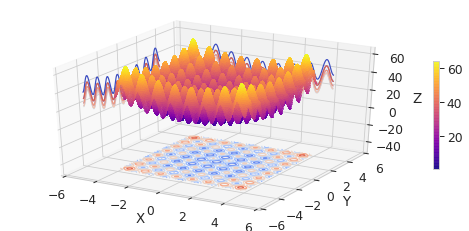

In [107]:
def rastrigin(*X, **kwargs):
    A = kwargs.get('A', 10)
    return A*len(X) + sum([(x**2 - A * np.cos(2 * np.pi * x)) for x in X])

X = np.linspace(-4, 4, 200)
Y = np.linspace(-4, 4, 200)

X, Y = np.meshgrid(X, Y)

Z = rastrigin(X, Y, A=10)

fig = plt.figure(figsize=(8,4))
ax = fig.gca(projection='3d')

p = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cm.plasma, linewidth=0, \
                alpha=0.6, antialiased=False) 
plt.colorbar(p, fraction=0.046, shrink=0.5, pad=0.04, alpha=0.6)

cset = ax.contour(X, Y, Z, zdir='x', offset=-6, cmap=cm.coolwarm)
cset = ax.contour(X, Y, Z, zdir='y', offset=6, cmap=cm.coolwarm)
cset = ax.contour(X, Y, Z, zdir='z', offset=-50, cmap=cm.coolwarm)


ax.set_xlabel('X')
ax.set_xlim(-6, 6)
ax.set_ylabel('Y')
ax.set_ylim(-6, 6)
ax.set_zlabel('Z')
ax.set_zlim(-50, 65)
plt.savefig('figs/rastrigin.pdf', bbox_inches = 'tight', pad_inches = 0)
# plt.savefig('figs/rastrigin.eps', format='eps', dpi=1000)

In [95]:
def costf(x,y):
    return np.sin(x) + np.cos(x)

In [110]:
class SimulatedAnnealing():
    
    def __init__(self, rand=12345):
        self.niter = 1000
        self.temp = 1
        self.interval = (-4, 4)
        self.rand = np.random.RandomState(rand)
        self.cost = rastrigin
        self.init_x = self.rand.uniform(self.interval[0], self.interval[1])
        self.init_y = self.rand.uniform(self.interval[0], self.interval[1])
        self.current_x = self.rand.uniform(self.interval[0], self.interval[1])
        self.current_y = self.rand.uniform(self.interval[0], self.interval[1])
        self.temp_reduction = 0.1 #
        self.all_positions = []
        self.all_costs = []
        self.all_best_positions = []
        self.all_best_costs = []
        self.i = []
        self.scale = np.linspace(-4, 4, self.niter)

    def move(self, i):
        self.new_x = self.current_x + (-1)**self.rand.choice([1,2]) *self.scale[i]
        self.new_y = self.current_y + (-1)**self.rand.choice([1,2]) *self.scale[i]
#         print(self.new_x, self.new_y)

    def run(self):

        
        self.current_best_cost = self.cost(self.current_x, self.current_y)
        for i in range(1, self.niter):
            T = self.temp/(i)
            
            current_cost = self.cost(self.current_x, self.current_y)
            self.move(i)
            new_cost = self.cost(self.new_x, self.new_y)
            
            boltzmann = np.exp(-(new_cost - current_cost) / (T))

            #Metropolis-Hastings 
            if (new_cost < current_cost) or (boltzmann > np.random.rand()):
                self.current_cost = new_cost
                self.current_x, self.current_y = self.new_x, self.new_y
                if new_cost < self.current_best_cost:
                    self.current_best_cost = new_cost
                    self.all_best_costs.append(new_cost)
                    self.all_best_positions.append([self.new_x, self.new_y])
                    self.i.append(i)
            self.all_costs.append(new_cost)
            self.all_positions.append([self.new_x, self.new_y])
                
        print(self.current_best_cost, self.current_x, self.current_y)

a = SimulatedAnnealing()
a.run()

0.04124814222248219 0.005885027951289867 -0.013167421225332543


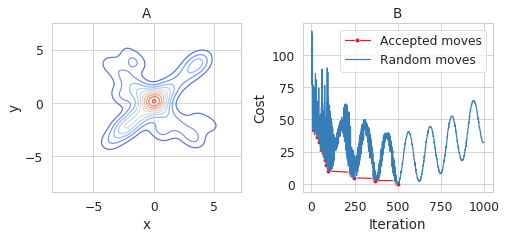

In [99]:
#subplot layout
fig, ((ax1, ax2)) = plt.subplots(nrows=1, ncols=2, sharex=False, sharey=False, figsize=(7,3))
fig.tight_layout(h_pad=5, w_pad=2)

#first plot
sns.kdeplot([i[0] for i in a.all_positions ] ,[i[1] for i in a.all_positions ], cmap='coolwarm', ax=ax1)
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_title('A')
#second plot
sns.lineplot(a.i, a.all_best_costs, marker='o', label="Accepted moves", ax=ax2)
sns.lineplot(list(range(1, len(a.all_costs)+1)), a.all_costs, label="Random moves", ax=ax2)
ax2.set_title('B')
ax2.set_xlabel('Iteration')
ax2.set_ylabel('Cost')
plt.savefig('figs/simulated_annealing.pdf', bbox_inches = 'tight', pad_inches = 0)

In [116]:
 for i, v in enumerate(a.all_costs):
        if v ==0.04124814222248219:
            print(i+1)

502
